In [145]:
## Data Analysis Phase
## MAin aim is to understand more about the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
link = pd.read_csv('athlete_events.csv')  # reading file
  
# data.head() display first 5 entry
# data.describe describe about model
# data.info give info about data
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)
print(link.head(), link.describe(), link.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A 

In [8]:
#merging the  file and reading the file
regions = pd.read_csv('datasets_31029_40943_noc_regions.csv')
print(regions.head())
  
# merging to data and regions frame
merged = pd.merge(link, regions, on='NOC', how='left')
print(merged.head())

   NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer

In [19]:
link

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,1.156269,1.647303,1.477511,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,1.142787,1.636235,1.409607,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,1.156269,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,1.260266,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,1.113344,1.652566,1.483130,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,1.214110,1.646230,1.501549,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,1.192660,1.642966,1.405493,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,1.192660,1.642966,1.405493,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,1.224128,1.652566,1.518276,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [99]:
#Checking the missing values in the above data
features_with_na=[features for features in link.columns if link[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature)

Age
Height
Weight
Medal


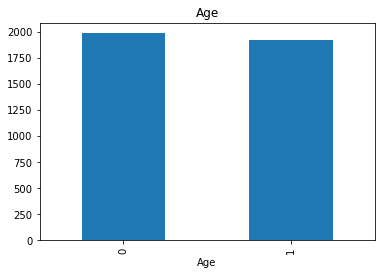

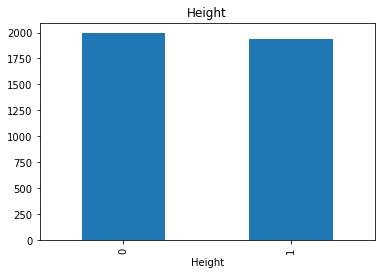

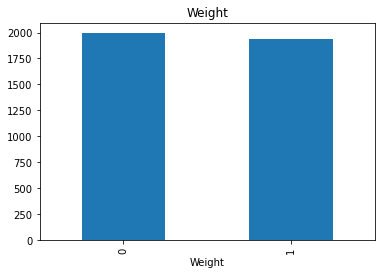

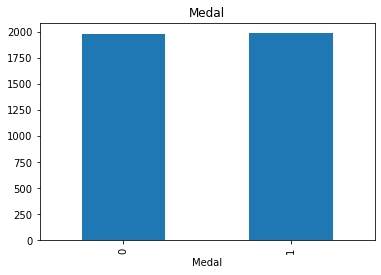

In [103]:
for feature in features_with_na:
    data = link.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the median year where the information is missing or present
    data.groupby(feature)['Year'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [97]:
# list of numerical variables
numerical_with_nan=[feature for feature in link.columns if link[feature].isnull().sum()>1 and link[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(link[feature].isnull().mean(),4)))

Age: 0.0349% missing value
Height: 0.2219% missing value
Weight: 0.2319% missing value


In [21]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=link[feature].median()
    
    ## create a new feature to capture nan values
    link[feature+'nan']=np.where(link[feature].isnull(),1,0)
    link[feature].fillna(median_value,inplace=True)
    
link[numerical_with_nan].isnull().sum()

Age       0
Height    0
Weight    0
dtype: int64

In [27]:
link

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Agenan,Heightnan,Weightnan
0,1,A Dijiang,M,1.156269,1.647303,1.477511,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0,0
1,2,A Lamusi,M,1.142787,1.636235,1.409607,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,1.156269,1.641864,1.446565,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,1,1
3,4,Edgar Lindenau Aabye,M,1.260266,1.641864,1.446565,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,1
4,5,Christine Jacoba Aaftink,F,1.113344,1.652566,1.483130,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,1.214110,1.646230,1.501549,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,0,0,0
271112,135570,Piotr ya,M,1.192660,1.642966,1.405493,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,0,0,0
271113,135570,Piotr ya,M,1.192660,1.642966,1.405493,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,0,0,0
271114,135571,Tomasz Ireneusz ya,M,1.224128,1.652566,1.518276,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,0,0,0


In [28]:
#checking the categorical variables
features_nan=[feature for feature in link.columns if link[feature].isnull().sum()>1 and link[feature].dtypes=='O']

## We will print the numerical nan variables and percentage of missing values
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(link[feature].isnull().mean(),4)))

Medal: 0.8533% missing values


In [30]:
## We will replace the missing data with new label
def replace_cat_feature(link,features_nan):
    data=link.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

link=replace_cat_feature(link,features_nan)

link[features_nan].isnull().sum()

Medal    0
dtype: int64

In [31]:
link


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Agenan,Heightnan,Weightnan
0,1,A Dijiang,M,1.156269,1.647303,1.477511,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Missing,0,0,0
1,2,A Lamusi,M,1.142787,1.636235,1.409607,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Missing,0,0,0
2,3,Gunnar Nielsen Aaby,M,1.156269,1.641864,1.446565,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Missing,0,1,1
3,4,Edgar Lindenau Aabye,M,1.260266,1.641864,1.446565,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,1
4,5,Christine Jacoba Aaftink,F,1.113344,1.652566,1.483130,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Missing,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,1.214110,1.646230,1.501549,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,Missing,0,0,0
271112,135570,Piotr ya,M,1.192660,1.642966,1.405493,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",Missing,0,0,0
271113,135570,Piotr ya,M,1.192660,1.642966,1.405493,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Missing,0,0,0
271114,135571,Tomasz Ireneusz ya,M,1.224128,1.652566,1.518276,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,Missing,0,0,0


In [32]:
## We will be using logarithmic transformation
import numpy as np
num_features=['Age', 'Height', 'Weight']

for feature in num_features:
    link[feature] =np.log(link[feature])

In [141]:
link.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [34]:
#checking categorical variables
categorical_features=[feature for feature in link.columns if link[feature].dtype=='O']


In [35]:
categorical_features

['Name',
 'Sex',
 'Team',
 'NOC',
 'Games',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [38]:
#Handling the Rare Categorical features
for feature in categorical_features:
    temp=link.groupby(feature)['Year'].count()/len(link)
    temp_df=temp[temp>0.01].index
    link[feature]=np.where(link[feature].isin(temp_df),link[feature],'Rare_var')

In [39]:
link

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Agenan,Heightnan,Weightnan
0,1,Rare_var,M,0.145198,0.499140,0.390359,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Missing,0,0,0
1,2,Rare_var,M,0.133470,0.492398,0.343311,China,CHN,2012 Summer,2012,Summer,London,Judo,Rare_var,Missing,0,0,0
2,3,Rare_var,M,0.145198,0.495832,0.369192,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Missing,0,1,1
3,4,Rare_var,M,0.231323,0.495832,0.369192,Rare_var,DEN,Rare_var,1900,Summer,Paris,Rare_var,Rare_var,Gold,0,1,1
4,5,Rare_var,F,0.107368,0.502329,0.394155,Netherlands,NED,Rare_var,1988,Winter,Rare_var,Speed Skating,Rare_var,Missing,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Rare_var,M,0.194011,0.498488,0.406497,Rare_var,POL,Rare_var,1976,Winter,Innsbruck,Rare_var,Rare_var,Missing,0,0,0
271112,135570,Rare_var,M,0.176186,0.496503,0.340388,Poland,POL,2014 Winter,2014,Winter,Sochi,Rare_var,Rare_var,Missing,0,0,0
271113,135570,Rare_var,M,0.176186,0.496503,0.340388,Poland,POL,2014 Winter,2014,Winter,Sochi,Rare_var,Rare_var,Missing,0,0,0
271114,135571,Rare_var,M,0.202228,0.502329,0.417575,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Rare_var,Missing,0,0,0


In [40]:
#Enumerating the categorical data
for feature in categorical_features:
    labels_ordered=link.groupby([feature])['Year'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    link[feature]=link[feature].map(labels_ordered)

In [41]:
link

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Agenan,Heightnan,Weightnan
0,1,0,0,0.145198,0.499140,0.390359,30,30,19,1992,0,20,18,3,3,0,0,0
1,2,0,0,0.133470,0.492398,0.343311,30,30,30,2012,0,15,28,5,3,0,0,0
2,3,0,0,0.145198,0.495832,0.369192,1,1,2,1920,0,2,9,0,3,0,1,1
3,4,0,0,0.231323,0.495832,0.369192,25,1,9,1900,0,1,25,5,0,0,1,1
4,5,0,1,0.107368,0.502329,0.394155,12,11,9,1988,1,8,16,5,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,0,0,0.194011,0.498488,0.406497,25,20,9,1976,1,11,25,5,3,0,0,0
271112,135570,0,0,0.176186,0.496503,0.340388,20,20,31,2014,1,29,25,5,3,0,0,0
271113,135570,0,0,0.176186,0.496503,0.340388,20,20,31,2014,1,29,25,5,3,0,0,0
271114,135571,0,0,0.202228,0.502329,0.417575,20,20,23,1998,1,23,17,5,3,0,0,0


In [42]:
#
scaling_feature=[feature for feature in link.columns if feature not in ['Id','Year'] ]
len(scaling_feature)

17

In [43]:
scaling_feature

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal',
 'Agenan',
 'Heightnan',
 'Weightnan']

In [45]:
link.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Agenan,Heightnan,Weightnan
0,1,0,0,0.145198,0.499140,0.390359,30,30,19,1992,0,20,18,3,3,0,0,0
1,2,0,0,0.133470,0.492398,0.343311,30,30,30,2012,0,15,28,5,3,0,0,0
2,3,0,0,0.145198,0.495832,0.369192,1,1,2,1920,0,2,9,0,3,0,1,1
3,4,0,0,0.231323,0.495832,0.369192,25,1,9,1900,0,1,25,5,0,0,1,1
4,5,0,1,0.107368,0.502329,0.394155,12,11,9,1988,1,8,16,5,3,0,0,0


In [57]:
feature_scale=[feature for feature in link.columns if feature not in ['Id','Year']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(link[feature_scale])

MinMaxScaler()

In [47]:
scaler.transform(link[feature_scale])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.37626319e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.47525264e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [9.99992624e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [142]:
link.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [54]:
#Droping the features
data = pd.concat([link[['ID', 'Year']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(link[feature_scale]), columns=feature_scale)],
                    axis=1)

In [59]:

data.to_csv('medal.csv',index=False)

In [143]:
link=pd.read_csv('medal.csv')

In [144]:
link.head()

,ID,Year,ID.1,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,Agenan,Heightnan,Weightnan
0,1,1992,0.000000,0.0,0.0,0.543970,0.626531,0.645729,0.967742,0.967742,0.59375,0.0,0.666667,0.620690,0.500000,1.0,0.0,0.0,0.0
1,2,2012,0.000007,0.0,0.0,0.524440,0.528580,0.515999,0.967742,0.967742,0.93750,0.0,0.500000,0.965517,0.833333,1.0,0.0,0.0,0.0
2,3,1920,0.000015,0.0,0.0,0.543970,0.578473,0.587363,0.032258,0.032258,0.06250,0.0,0.066667,0.310345,0.000000,1.0,0.0,1.0,1.0
3,4,1900,0.000022,0.0,0.0,0.687379,0.578473,0.587363,0.806452,0.032258,0.28125,0.0,0.033333,0.862069,0.833333,0.0,0.0,1.0,1.0
4,5,1988,0.000030,0.0,1.0,0.480977,0.672872,0.656196,0.387097,0.354839,0.28125,1.0,0.266667,0.551724,0.833333,1.0,0.0,0.0,0.0


In [63]:
olm=link[['Year']]

In [64]:
medal=link.drop(['ID','Year'],axis=1)

In [65]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(medal, olm)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [66]:
feature_sel_model.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [68]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = medal.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((medal.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 17
selected features: 16


In [69]:
selected_feat

Index(['ID.1', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Season', 'City', 'Sport', 'Event', 'Medal', 'Agenan', 'Heightnan',
       'Weightnan'],
      dtype='object')

In [70]:
medal=medal[selected_feat]

In [71]:
medal

,ID.1,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,Agenan,Heightnan,Weightnan
0,0.000000,0.0,0.543970,0.626531,0.645729,0.967742,0.967742,0.59375,0.0,0.666667,0.620690,0.500000,1.0,0.0,0.0,0.0
1,0.000007,0.0,0.524440,0.528580,0.515999,0.967742,0.967742,0.93750,0.0,0.500000,0.965517,0.833333,1.0,0.0,0.0,0.0
2,0.000015,0.0,0.543970,0.578473,0.587363,0.032258,0.032258,0.06250,0.0,0.066667,0.310345,0.000000,1.0,0.0,1.0,1.0
3,0.000022,0.0,0.687379,0.578473,0.587363,0.806452,0.032258,0.28125,0.0,0.033333,0.862069,0.833333,0.0,0.0,1.0,1.0
4,0.000030,1.0,0.480977,0.672872,0.656196,0.387097,0.354839,0.28125,1.0,0.266667,0.551724,0.833333,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,0.999985,0.0,0.625250,0.617061,0.690228,0.806452,0.645161,0.28125,1.0,0.366667,0.862069,0.833333,1.0,0.0,0.0,0.0
271112,0.999993,0.0,0.595569,0.588228,0.507941,0.645161,0.645161,0.96875,1.0,0.966667,0.862069,0.833333,1.0,0.0,0.0,0.0
271113,0.999993,0.0,0.595569,0.588228,0.507941,0.645161,0.645161,0.96875,1.0,0.966667,0.862069,0.833333,1.0,0.0,0.0,0.0
271114,1.000000,0.0,0.638932,0.672872,0.720774,0.645161,0.645161,0.71875,1.0,0.766667,0.586207,0.833333,1.0,0.0,0.0,0.0


In [81]:
def diagnostic_plots(data, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)

    plt.show()

Text(0.5, 1.0, 'year vs Age')

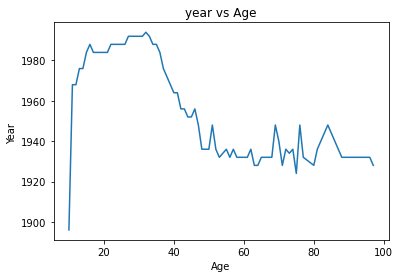

In [131]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year and the Age

link.groupby('Age')['Year'].median().plot()
plt.xlabel('Age')
plt.ylabel('Year ')
plt.title("year vs Age")

Text(0.5, 1.0, 'Year vs Season')

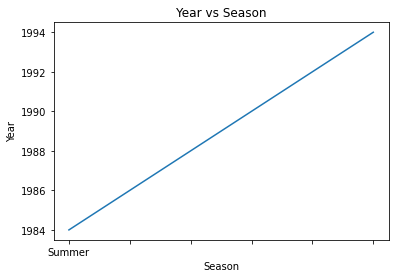

In [134]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between Season and Year

link.groupby('Season')['Year'].median().plot()
plt.xlabel('Season')
plt.ylabel('Year')
plt.title("Year vs Season")

In [ ]:
def diagnostic_plots(data, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    data[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.show()

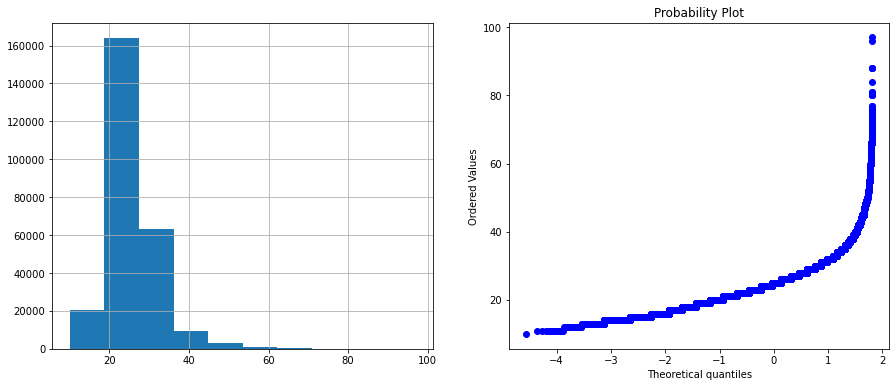

In [138]:
diagnostic_plots(data, 'Age')